# Exploring and Predicting Consumer Spending Trends
## Introduction
In this project, I assist Red Little Book (Xiaohongshu) in analysing the impact of different business decisions on sales performance.

Using user data and consumption behaviour data, I will develop a linear regression model in Python to predict changes in user spending. The analysis will also identify the key factors that significantly influence consumer behaviour, providing valuable insights for strategic decision-making.

## Attribute Information
* revenue: The total amount spent by the user on orders.
* 3rd_party_stores: The number of purchases made from third-party merchants within the app (0 indicates purchases from in-house products only).
* gender: User’s gender (1 = male, 0 = female, unknown = missing value).
* age: User’s age (unknown = missing value).
* engaged_last_30: Whether the user has participated in key activities within the app in the last 30 days.
* lifecycle: The user’s lifecycle stage:
  - A: Registered within the last 6 months.
  - B: Registered within the last year.
  - C: Registered within the last two years.
* days_since_last_order: Number of days since the user's last purchase (less than 1 indicates an order was placed on the same day).
* previous_order_amount: The total historical spending of the user.

***

## Asking Question
* What factors influence user spending?
* What is the impact of user lifecycle on revenue?
* How does engagement in the last 30 days affect sales?
* What is the impact of user gender on revenue?
* What is the effect of third-party store purchases on revenue?
* What is the relationship between order frequency and revenue?
* Can we predict future user spending using a linear regression model?

***

## 2. Data Wrangling

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#load dataset
red = pd.read_csv('redNew.csv')
red.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [3]:
# preview dataset info
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   17723 non-null  float64
 2   age                      16716 non-null  float64
 3   engaged_last_30          17723 non-null  float64
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [10]:
# check null values proportions
red.isnull().sum()/red.count()

,0
revenue,0.000000
gender,0.661795
age,0.761905
engaged_last_30,0.661795
lifecycle,0.000000
days_since_last_order,0.000000
previous_order_amount,0.000000
3rd_party_stores,0.000000


There are in total of 8 columns and 29452 rows. We have null data from 'gender', 'age', and 'engaged_last_30'. The percentage of null value from these three attributes are approximately around 70%. Hence, we cannot directly delete null values, as it will lead to a significant data loss.

In [11]:
# distribution
red.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,398.288037,0.950742,60.397404,0.073069,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,11.740000,3096.766500,3.000000
max,103466.100000,1.000000,99.000000,1.000000,23.710000,11597.900000,10.000000


In [12]:
red['gender'] = red['gender'].fillna('unknown')

In [13]:
red['engaged_last_30'] = red['engaged_last_30'].fillna('unknown')

In [14]:
red = red.fillna(red.mean(numeric_only=True))
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   gender                   29452 non-null  object 
 2   age                      29452 non-null  float64
 3   engaged_last_30          29452 non-null  object 
 4   lifecycle                29452 non-null  object 
 5    days_since_last_order   29452 non-null  float64
 6   previous_order_amount    29452 non-null  float64
 7   3rd_party_stores         29452 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In dealing with empty values, I have taken two approaches:
1. Categorical value: with categorical attributes such as 'gender' and 'engaged_last_30', I decided to fill-in with 'unknown'. Doing so can recognise missingness as a separate category.
2. Continuous value: with continuous attributes such as 'age', I decided to use the mean (or median, depending on the distribution). This prevents data loss while maintaining the overall distribution of the dataset.

## 3. Data Analysis


### 3.1 Continuous Analysis

Skewness of log_revenue: 0.04393911386898555


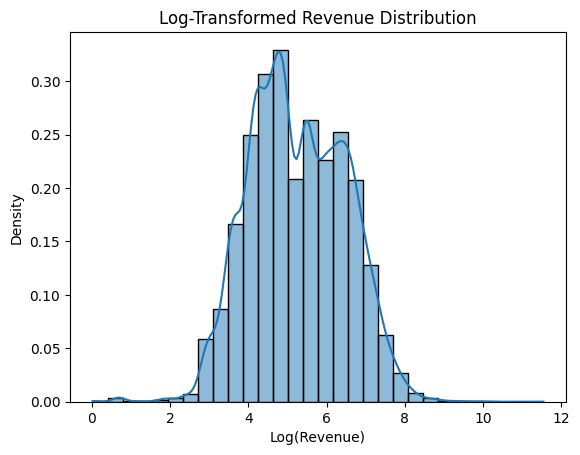

In [24]:
red['log_revenue'] = np.log1p(red['revenue'])
print("Skewness of log_revenue:", red['log_revenue'].skew())
sns.histplot(red['log_revenue'], stat='density', bins=30, kde=True)
plt.title("Log-Transformed Revenue Distribution")
plt.xlabel("Log(Revenue)")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='previous_order_amount', ylabel='Density'>

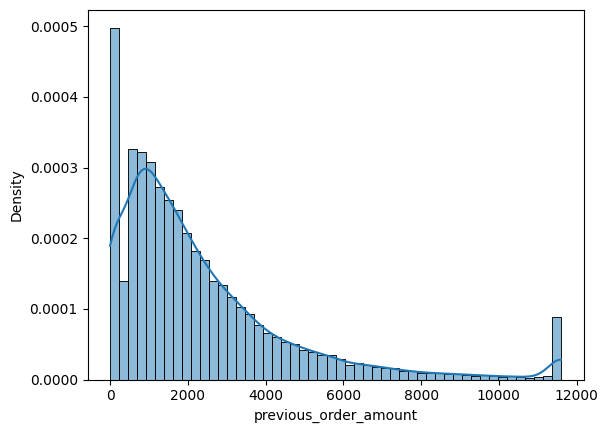

In [25]:
sns.histplot(red['previous_order_amount'], kde=True, bins=50, stat='density')

<Axes: xlabel='age', ylabel='Density'>

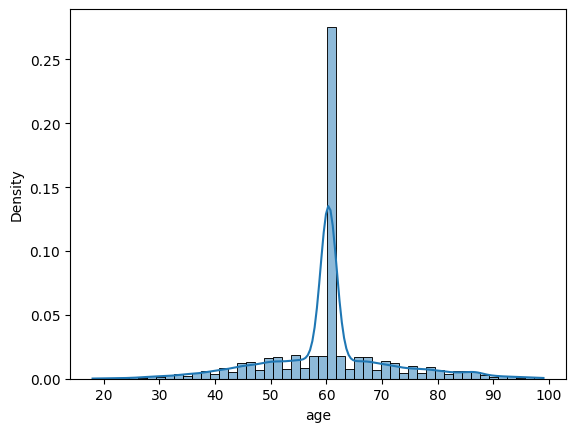

In [26]:
sns.histplot(red['age'], kde=True, bins=50, stat='density')

In [27]:
red['age'].describe()

,age
count,29452.000000
mean,60.397404
std,11.167091
min,18.000000
25%,58.000000
50%,60.397404
75%,62.000000
max,99.000000


It is found that the revenue is highly skewed, with a great concenrtation between 0-200. Similarly, users' previous order amount ranges between 0-100.

Overall, users ang ranges between 18 to 99 years olds. The average age is 60.4 years old, and median is also 60.4 years old. Most of the users' age concentrates between 58 to 62 years old.

The age heavily concentrated around 60. Two possibilities that the data might genuinely reflect an older demographic mostly in their late 50s or early 60s, or 60s is the default age setting.

<Axes: xlabel='days_since_last_order', ylabel='Density'>

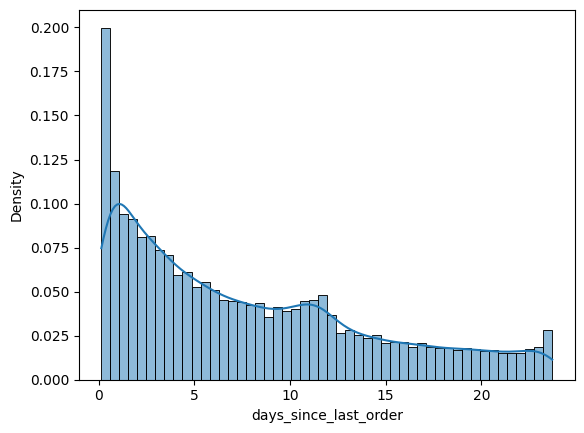

In [28]:
# delete a space in front of days_since_last_order
red.rename(columns = {' days_since_last_order ':'days_since_last_order'}, inplace = True)
# red.info()

sns.histplot(red['days_since_last_order'], kde=True, bins=50, stat='density')

In [29]:
red['days_since_last_order'].describe()

,days_since_last_order
count,29452.000000
mean,7.711348
std,6.489289
min,0.130000
25%,2.190000
50%,5.970000
75%,11.740000
max,23.710000


* The days since last order ranges between 0 - 23 days. All users placed orders within this month.
* Users will place another order in average of 7.7 days since the last order.
* From the visualisation, there is a high frequency of users placing orders in 0 - 1 days since the last order.

### 3.2 Categorical Analysis

#### 3.2.1 What is the impact of user lifecycle on revenue?

In [54]:
group_means_log = red.groupby("lifecycle")["log_revenue"].mean()

group_means_original = group_means_log.apply(np.expm1)

print(group_means_original)

lifecycle
A    185.756586
B    187.184001
C    192.415612
Name: log_revenue, dtype: float64


<ipython-input-35-659765e140df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'lifecycle', data = red, order = red['lifecycle'].value_counts().index, palette='Set2')


<Axes: xlabel='lifecycle', ylabel='count'>

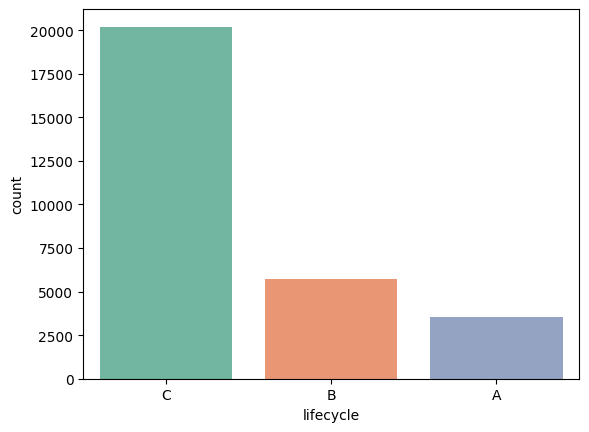

In [35]:
# calculate the total number of different lifecycle
sns.countplot(x = 'lifecycle', data = red, order = red['lifecycle'].value_counts().index, palette='Set2')

<ipython-input-36-2d50e2731c47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'lifecycle', y = 'log_revenue', data = red, order = red['lifecycle'].value_counts().index,


<Axes: xlabel='lifecycle', ylabel='log_revenue'>

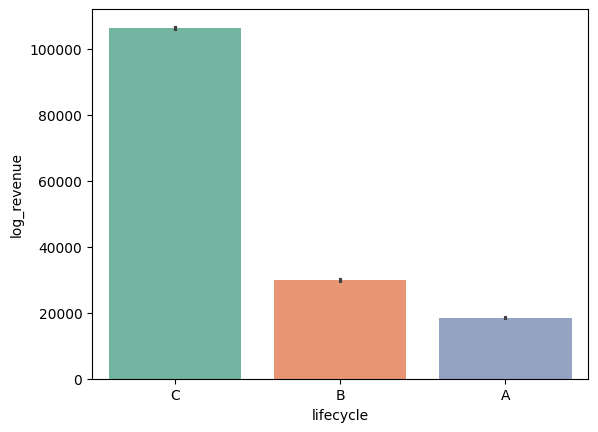

In [36]:
# calculate total revenue of each lifecycle
sns.barplot(x = 'lifecycle', y = 'log_revenue', data = red, order = red['lifecycle'].value_counts().index,
            estimator = np.sum, palette = 'Set2')

In [51]:
red['lifecycle'].describe()

,lifecycle
count,29452
unique,3
top,C
freq,20201


* Lifecycle C (registered within the last 2 years) have the highest number of users.
* Based on the log-transformed data, user C has the highest geometric mean revenue, about 192.4. User B follows with around 187.2, and user A is about 185.8.
* User C has the highest total amount of revenue. User A has the least.
* Most of the revenue are gained from user C.

#### 3.2.2 What is the impact of user gender on revenue?

In [59]:
log_mean_by_gender = red.groupby('gender')['log_revenue'].mean()

mean_by_gender = np.expm1(log_mean_by_gender)

print(mean_by_gender)

gender
0.0        158.366799
1.0        189.571378
unknown    194.705124
Name: log_revenue, dtype: float64


<ipython-input-160-7d2816ee20f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'gender', data = red, order = red['gender'].value_counts().index, palette = 'Set2')


<Axes: xlabel='gender', ylabel='count'>

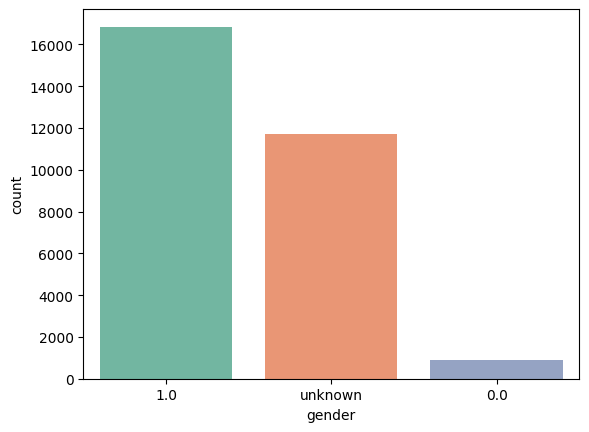

In [ ]:
sns.countplot(x = 'gender', data = red, order = red['gender'].value_counts().index, palette = 'Set2')

<ipython-input-41-5f4a6d70a963>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gender', y = 'log_revenue', data = red, palette = 'Set2')


<Axes: xlabel='gender', ylabel='log_revenue'>

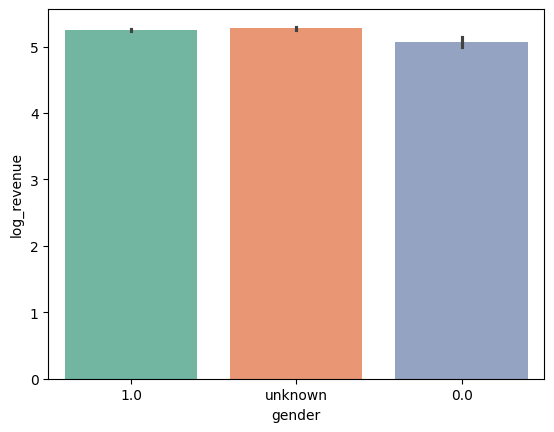

In [41]:
sns.barplot(x = 'gender', y = 'log_revenue', data = red, palette = 'Set2')

<ipython-input-42-5f0d50430f8a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gender', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')


<Axes: xlabel='gender', ylabel='log_revenue'>

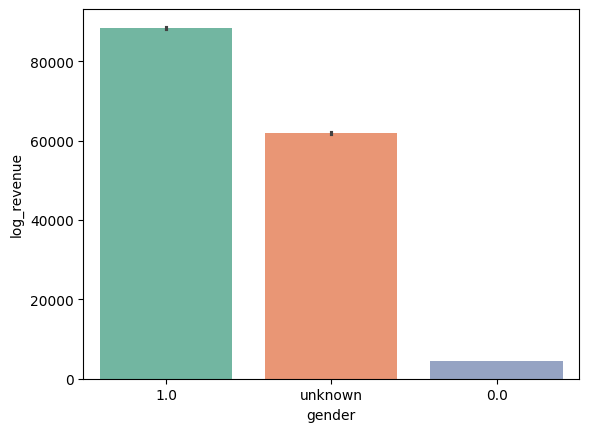

In [42]:
sns.barplot(x = 'gender', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')

* Male customers far outnumber female customers.
* On asverage, sales amount from male customers is slightly higher than that from female customers.
* On average, the majority of total sales are contributed by male customers.







#### 3.2.3 How does engagement in the last 30 days affect sales?

In [56]:
engaged_means_log = red.groupby('engaged_last_30')['log_revenue'].mean()

engaged_means_original = engaged_means_log.apply(np.expm1)

print(engaged_means_original)

engaged_last_30
0.0        182.439622
1.0        273.054931
unknown    194.705124
Name: log_revenue, dtype: float64


<ipython-input-46-bc44ca03a161>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'engaged_last_30', data = red, order = red['engaged_last_30'].value_counts().index, palette='Set2')


<Axes: xlabel='engaged_last_30', ylabel='count'>

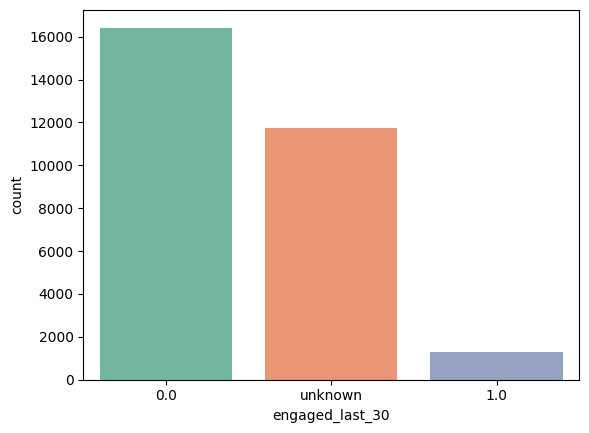

In [46]:
# total amount of users by each category
sns.countplot(x = 'engaged_last_30', data = red, order = red['engaged_last_30'].value_counts().index, palette='Set2')

<ipython-input-47-5758071f36d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'engaged_last_30', y = 'log_revenue', data = red, palette = 'Set2')


<Axes: xlabel='engaged_last_30', ylabel='log_revenue'>

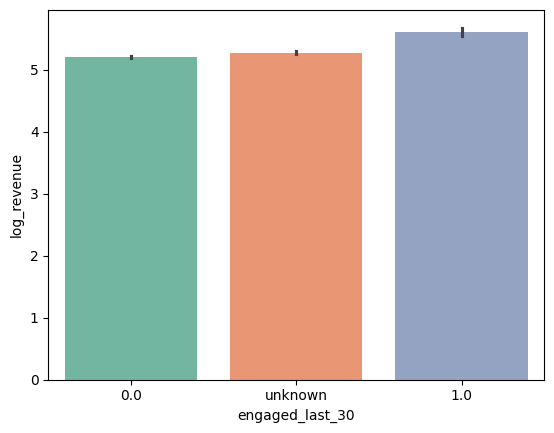

In [47]:
# average revenue by each category
sns.barplot(x = 'engaged_last_30', y = 'log_revenue', data = red, palette = 'Set2')

<ipython-input-48-277598f35779>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'engaged_last_30', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')


<Axes: xlabel='engaged_last_30', ylabel='log_revenue'>

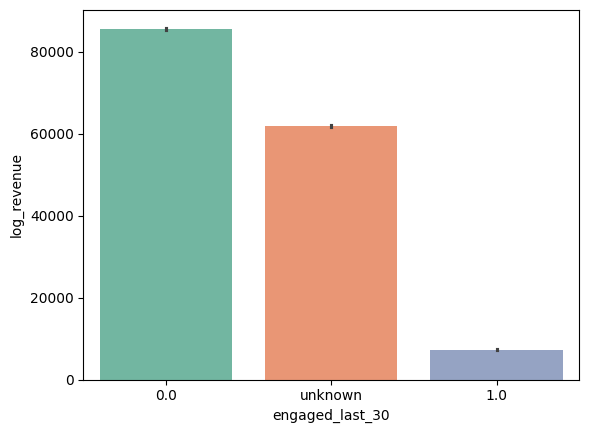

In [48]:
# total revenue by each category
sns.barplot(x = 'engaged_last_30', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')

In [49]:
red['engaged_last_30'].describe()

,engaged_last_30
count,29452.0
unique,3.0
top,0.0
freq,16428.0


* Most users did not participate in any activities on the app within the last 30 days.
* Users who engaged in the past 30 days have the highest geometric mean revenue, around 273 yuan, compared to 182 yuan for non‑engaged users.
* The majority of total sales are generated by users who did not participate in any activities on the app in the past 30 days.

#### 3.2.4 What is the effect of third-party store purchases on revenue?

<ipython-input-169-046431a12f5a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = '3rd_party_stores', data = red,


<Axes: xlabel='3rd_party_stores', ylabel='count'>

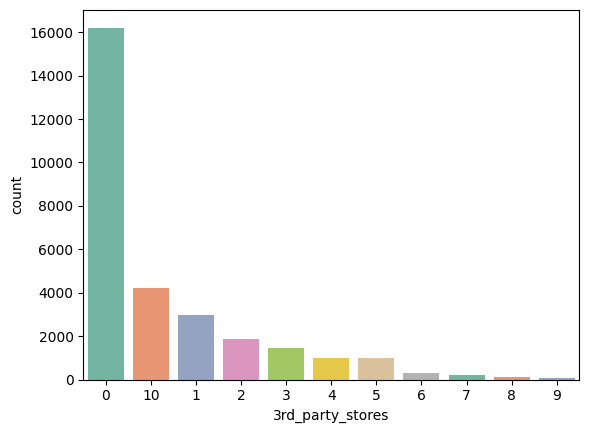

In [ ]:
sns.countplot(x = '3rd_party_stores', data = red,
              order = red['3rd_party_stores'].value_counts().index, palette = 'Set2')

<ipython-input-60-e9dc3664e6ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = '3rd_party_stores', y = 'log_revenue', data = red, palette = 'Set2')


<Axes: xlabel='3rd_party_stores', ylabel='log_revenue'>

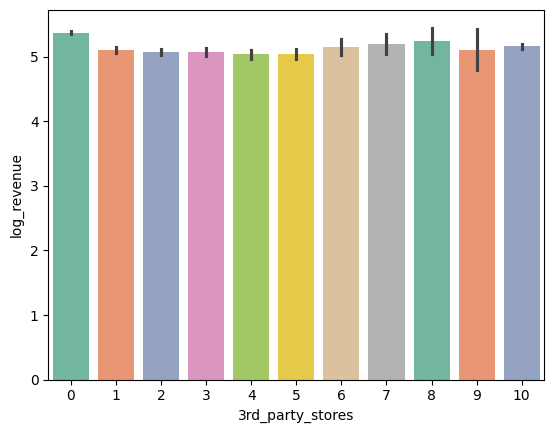

In [60]:
sns.barplot(x = '3rd_party_stores', y = 'log_revenue', data = red, palette = 'Set2')

<ipython-input-61-eac5edefb448>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = '3rd_party_stores', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')


<Axes: xlabel='3rd_party_stores', ylabel='log_revenue'>

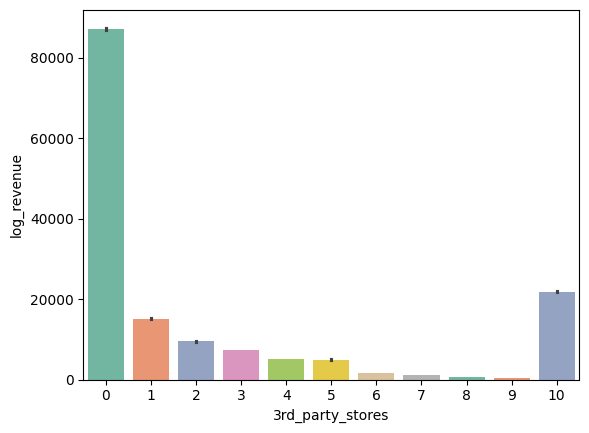

In [61]:
sns.barplot(x = '3rd_party_stores', y = 'log_revenue', data = red, estimator = sum, palette = 'Set2')

* The largest group of customers are those who have never purchased from a third-party app, followed by those who have made 10 purchases.
* Although the average sales amount are quite similar, customers who have never purchased from a third-party app have the highest average sales amount.
* The majority of total sales are contributed by customers who have never purchased from a third-party app, followed by those who have made 10 purchases, then those who have made 1–5 purchases, with the smallest contribution coming from customers who have made 6–10 purchases.

#### 3.2.5 What is the relationship between order frequency and revenue?

In [62]:
red=pd.get_dummies(red)
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  29452 non-null  float64
 1   age                      29452 non-null  float64
 2   days_since_last_order    29452 non-null  float64
 3   previous_order_amount    29452 non-null  float64
 4   3rd_party_stores         29452 non-null  int64  
 5   log_revenue              29452 non-null  float64
 6   gender_0.0               29452 non-null  bool   
 7   gender_1.0               29452 non-null  bool   
 8   gender_unknown           29452 non-null  bool   
 9   engaged_last_30_0.0      29452 non-null  bool   
 10  engaged_last_30_1.0      29452 non-null  bool   
 11  engaged_last_30_unknown  29452 non-null  bool   
 12  lifecycle_A              29452 non-null  bool   
 13  lifecycle_B              29452 non-null  bool   
 14  lifecycle_C           

<Axes: >

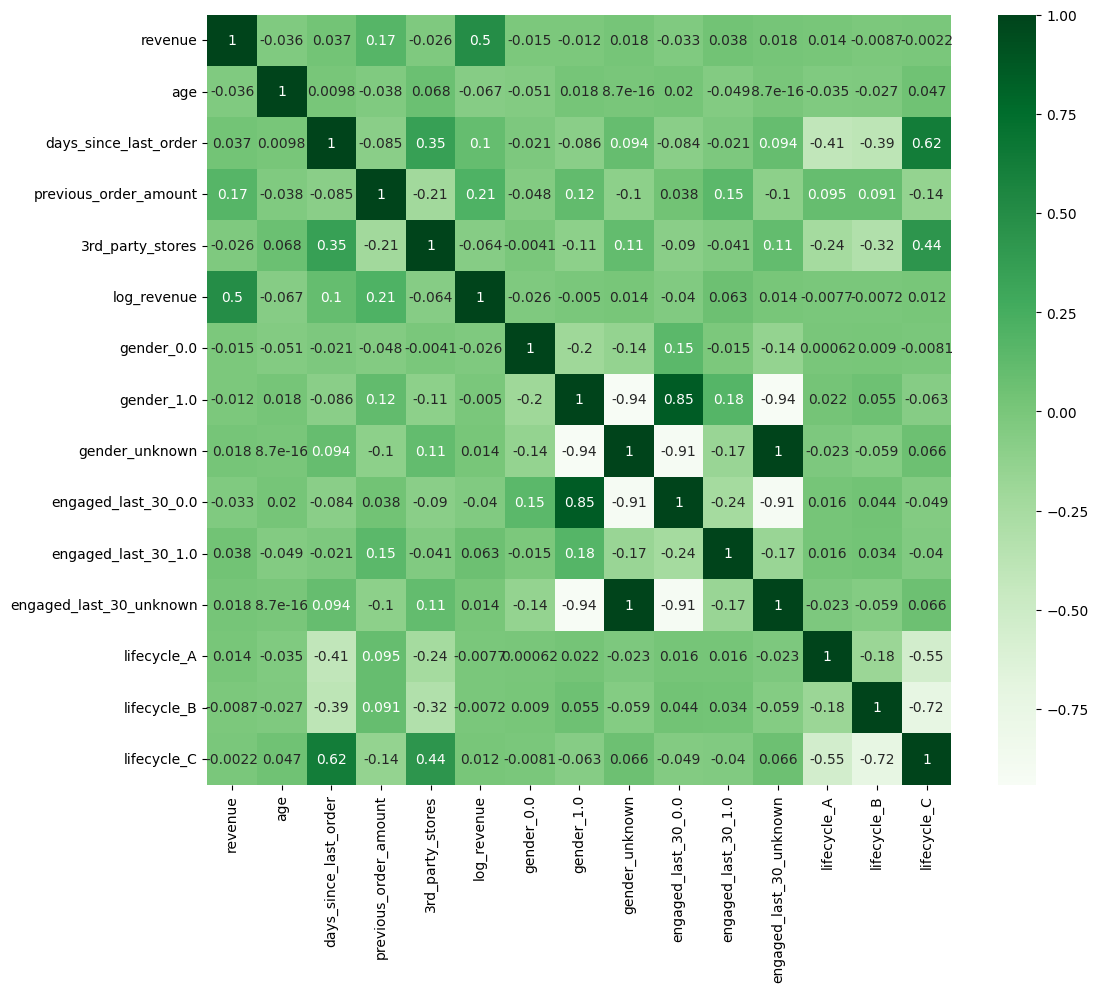

In [66]:
plt.figure(figsize=[12,10])
sns.heatmap(red.corr(),cmap = 'Greens', annot=True)

In [64]:
red.corr()[['log_revenue']].sort_values('log_revenue', ascending = False)

,log_revenue
log_revenue,1.000000
revenue,0.497648
previous_order_amount,0.209910
days_since_last_order,0.104079
engaged_last_30_1.0,0.062893
gender_unknown,0.014192
engaged_last_30_unknown,0.014192
lifecycle_C,0.011534
gender_1.0,-0.005007
lifecycle_B,-0.007187


Answer: Revenue does not have a significant correlation with any other variable.

Insights:
* days_since_last_order, 3rd_party_stores, and lifecycle_C show moderate positive correlations (0.2–0.4).
* gender_1.0 and engaged_last_30_0.0 also have a mild positive correlation (0.23).


## 4. Modelling

In [43]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenue                29452 non-null  float64
 1   gender                 29452 non-null  object 
 2   age                    29452 non-null  float64
 3   engaged_last_30        29452 non-null  object 
 4   lifecycle              29452 non-null  object 
 5   days_since_last_order  29452 non-null  float64
 6   previous_order_amount  29452 non-null  float64
 7   3rd_party_stores       29452 non-null  int64  
 8   log_revenue            29452 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.0+ MB


#### 4.1 Model Building

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

y = np.log1p(red['revenue'])
x = red[['previous_order_amount','engaged_last_30_1.0','days_since_last_order','lifecycle_C']]

model.fit(x,y)

LinearRegression()

#### 4.2 Accuracy Test

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#model = model(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 1.171866779497277
MAE: 0.9627570031345574


In [81]:
from statsmodels.formula.api import ols

red = red.rename(columns={'engaged_last_30_1.0': 'engaged_last_30_1'})

# Define the formula, treating `lifecycle_C` as categorical
formula = 'log_revenue ~ previous_order_amount + engaged_last_30_1 + days_since_last_order + C(lifecycle_C)'
model = ols(formula, data=red).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     485.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:26:51   Log-Likelihood:                -46726.
No. Observations:               29452   AIC:                         9.346e+04
Df Residuals:                   29447   BIC:                         9.350e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

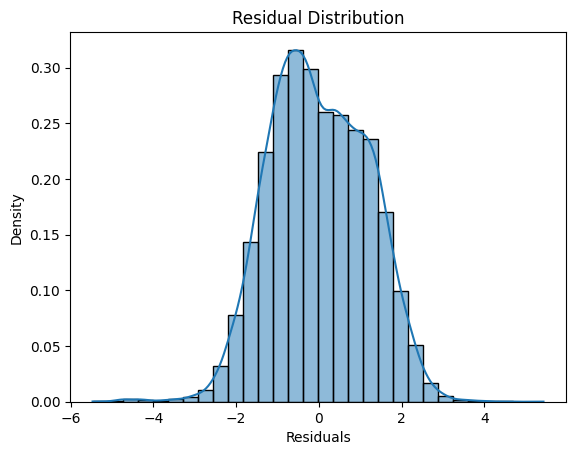

In [82]:
sns.histplot(model.resid, stat='density', bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

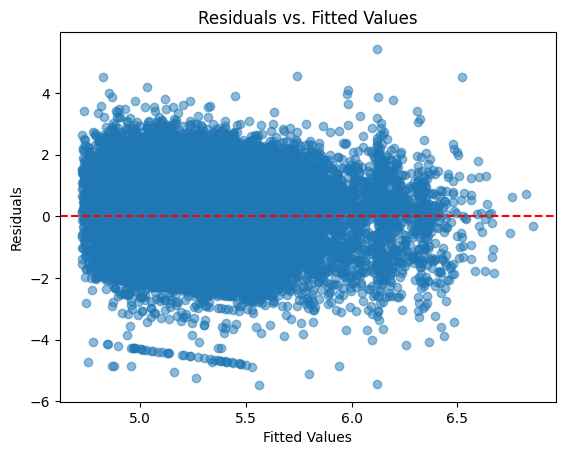

In [83]:
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

## 5. Recommendations

#### 5.1 User Analysis

- **Age Distribution:**  
  Users’ ages range from 18 to 99 years, with both the mean and median around 60 years. Most users are concentrated between 58 and 63 years. Notably, a large subgroup (nearly 30,000 users) appears to have the default age of 60, suggesting that many users did not update their age information.

#### 5.2 Sales Variable Analysis – High-Value Users

- **User Lifecycle Segmentation:**  
 Although the **geometric mean** revenue (obtained by exponentiating the mean log‑revenue) is highest for users in group A (those registered within 6 months), the total revenue contribution is highest from group C (users registered for two years) because they constitute the largest segment.
  
- **Third-Party App Purchases:**  
 - These customers not only form the largest group but also record the highest average revenue on a geometric (multiplicative) scale.
  - Customers with 10 purchases through third-party apps come next, followed by those with 1–5 and 6–10 purchases, with the latter two groups showing similar average revenue levels (though the 6–10 group’s average is slightly higher than that of the 1–5 group).

- **Correlation Insights:**  
  - **Gender and Engagement:** There is a mild positive correlation between the male indicator (gender_1.0) and non-engagement in the last 30 days (engaged_last_30_0.0).
  - **Revenue Relationships:** Revenue does not have strong correlations with any individual variable, implying that sales are influenced by a mix of factors rather than a single driver.

  #### 5.3 Strategies
 - Focus on increasing engagement and personalised marketing for high-value segments (especially group C).
 - Direct activities, advertisements, and marketing efforts primarily at male users.
 - Increase initiatives to motivate users to participate in app-based activities, with extra emphasis on engaging male users.
 - For users who have never made a purchase through third-party apps, implement targeted push notifications, ads, and special coupon offers. Additionally, consider a secondary round of promotions for those who have made 10 or more third-party purchases, as they represent a valuable yet distinct segment.